# Chapter 4 - Training Models

## Normal Equation

In [1]:
# theta = (X^T . X)^(-1) . X^T . y

In [2]:
#
# Generate a dataset
# 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# np.random.rand returns a sample from the uniform distribution;
# arguments are the dimensions of the returned array
X = 2 * np.random.rand(100, 1)

# np.random.randn returns a sample from the normal distribution
y = 4 + 3 * X + np.random.randn(100, 1)

# Preview dataset
plt.plot(X, y, 'b.')
plt.show()

<Figure size 640x480 with 1 Axes>

### Using numpy

In [3]:
#
# Compute theta using normal equation
#

# Add x0 = 1 to each instance, using np.c_ to concatenate columns
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.0050708 ],
       [2.99615858]])

In [4]:
#
# Draw line of best fit over original dataset
#

# Generate input data points for extent of dataset
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Generate 'predictions'
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.0050708 ],
       [9.99738795]])

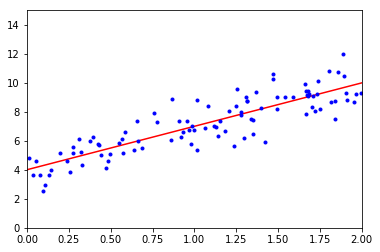

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Using Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.0050708]), array([[2.99615858]]))

In [7]:
lin_reg.predict(X_new)

array([[4.0050708 ],
       [9.99738795]])

## Gradient Descent

### Basic algorithm

In [8]:
# Learning rate and number of iterations
eta = 0.1
n_iterations = 1000

# Number of samples
m = 100

# Initialise random weights
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.0050708 ],
       [2.99615858]])

### Visualise progress over several iterations

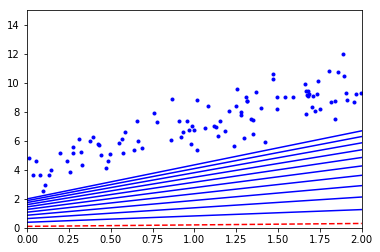

In [9]:
def visualise_gd(eta, n_iterations):
    # Initialise theta with arbitrary small weights for deterministic output
    theta = np.array([[0.1],[0.1]])

    # Prepare plot
    plt.plot(X, y, "b.")
    plt.axis([0, 2, 0, 15])

    # Points on X axis used to render current line of best fit
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_predict = X_new_b.dot(theta)
    
    # Dashed red line is the starting point
    plt.plot(X_new, y_predict, "r--")

    # Draw a solid blue line for the output at each iteration
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "b-")

    plt.show()
    
visualise_gd(0.02, 10)

### Gradient descent with various learning rates

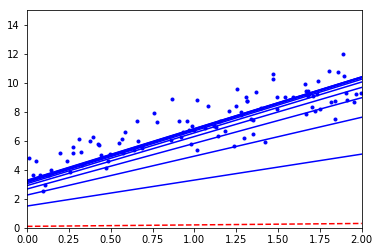

In [10]:
visualise_gd(0.1, 10)

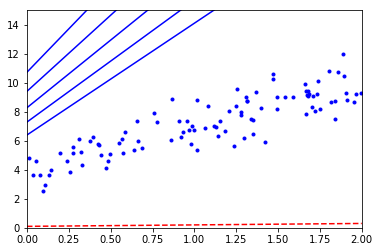

In [11]:
visualise_gd(0.45, 10)

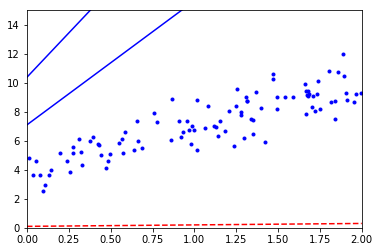

In [12]:
visualise_gd(0.5, 10)

## Stochastic Gradient Descent

### Basic algorithm

In [13]:
n_epochs = 50

# Learning schedule hyper-parameters
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

#
# Note that since instances are picked randomly, some instances may be 
# picked several times per epoch while others may not be picked at all.
# If you want to be sure that the algorithm goes through every instance
# at each epoch, another approach is to shuffle the training set, then
# go through it instance by instance, then shuffle it again, and so on.
#
# However, this generally converges more slowly.
#
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.00801486],
       [3.01593335]])

### Using Scikit-Learn

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97746997]), array([3.01585477]))

In [15]:
# For reference, numpy's ravel() function returns a contiguous flattened array
y.ravel().shape

(100,)

In [16]:
# Comparing this with the shape of y, we see that the last dimension has been discarded
y.shape

(100, 1)

## Mini-batch Gradient Descent

In [17]:
# TODO: Implement an example

## Polynomial Regression

### Define a dataset

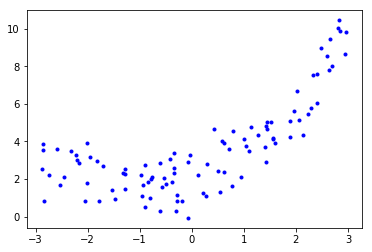

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.show()

### Using Scikit-Learn

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.00655058])

In [20]:
X_poly[0]

array([1.00655058, 1.01314406])

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.0647644]), array([[0.96308239, 0.4979699 ]]))

In [22]:
lin_reg.predict([[1, 0]])


array([[3.02784679]])

In [23]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [24]:
X_new_poly = poly_features.transform(X_new)
X_new_poly

array([[-3.00000000e+00,  9.00000000e+00],
       [-2.93939394e+00,  8.64003673e+00],
       [-2.87878788e+00,  8.28741965e+00],
       [-2.81818182e+00,  7.94214876e+00],
       [-2.75757576e+00,  7.60422406e+00],
       [-2.69696970e+00,  7.27364555e+00],
       [-2.63636364e+00,  6.95041322e+00],
       [-2.57575758e+00,  6.63452709e+00],
       [-2.51515152e+00,  6.32598714e+00],
       [-2.45454545e+00,  6.02479339e+00],
       [-2.39393939e+00,  5.73094582e+00],
       [-2.33333333e+00,  5.44444444e+00],
       [-2.27272727e+00,  5.16528926e+00],
       [-2.21212121e+00,  4.89348026e+00],
       [-2.15151515e+00,  4.62901745e+00],
       [-2.09090909e+00,  4.37190083e+00],
       [-2.03030303e+00,  4.12213039e+00],
       [-1.96969697e+00,  3.87970615e+00],
       [-1.90909091e+00,  3.64462810e+00],
       [-1.84848485e+00,  3.41689624e+00],
       [-1.78787879e+00,  3.19651056e+00],
       [-1.72727273e+00,  2.98347107e+00],
       [-1.66666667e+00,  2.77777778e+00],
       [-1.

In [25]:
y_new = lin_reg.predict(X_new_poly)
y_new

array([[3.65724637],
       [3.53636412],
       [3.41914006],
       [3.30557418],
       [3.19566648],
       [3.08941696],
       [2.98682562],
       [2.88789246],
       [2.79261748],
       [2.70100069],
       [2.61304207],
       [2.52874164],
       [2.44809938],
       [2.37111531],
       [2.29778942],
       [2.22812171],
       [2.16211218],
       [2.09976084],
       [2.04106767],
       [1.98603269],
       [1.93465588],
       [1.88693726],
       [1.84287682],
       [1.80247456],
       [1.76573048],
       [1.73264458],
       [1.70321686],
       [1.67744733],
       [1.65533597],
       [1.6368828 ],
       [1.62208781],
       [1.61095099],
       [1.60347236],
       [1.59965192],
       [1.59948965],
       [1.60298556],
       [1.61013965],
       [1.62095193],
       [1.63542239],
       [1.65355102],
       [1.67533784],
       [1.70078284],
       [1.72988602],
       [1.76264738],
       [1.79906693],
       [1.83914465],
       [1.88288056],
       [1.930

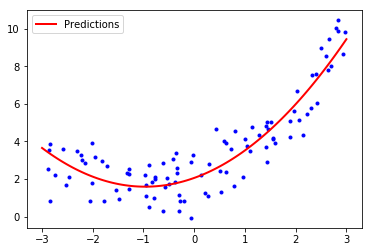

In [26]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left")
plt.show()

## Learning Curves

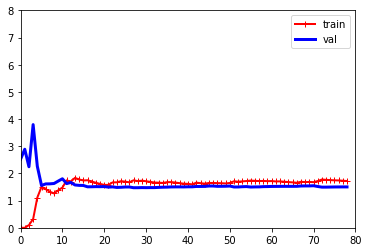

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.axis([0, 80, 0, 8])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right")
    plt.show()

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

### 10th degree polynomial

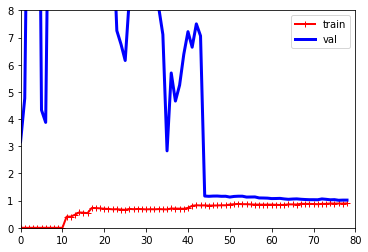

In [41]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curve(polynomial_regression, X, y)